Question 1: What is Simple Linear Regression?

Answer:

Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: a dependent variable (the one you want to predict) and an independent variable (the one you use for prediction). It assumes a linear relationship between the variables, meaning the relationship can be represented by a straight line. The goal is to find the line that best fits the data, allowing you to predict the dependent variable's value based on the independent variable's value.

Question 2: What are the key assumptions of Simple Linear Regression?

Answer:

The key assumptions of Simple Linear Regression are:

1. Linearity: The relationship between the independent and dependent variables is linear.
2. Independence: The observations are independent of each other.

3. Homoscedasticity (Constant Variance): The variance of the residuals (the differences between the observed and predicted values) is constant across all levels of the independent variable.
4. Normality: The residuals are normally distributed.
5. No multicollinearity: When dealing with multiple independent variables (in multiple linear regression), they should not be highly correlated with each other. (While this is for multiple linear regression, it's often mentioned in the context of regression assumptions).

Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Answer:

Heteroscedasticity is the violation of the homoscedasticity assumption, meaning the variance of the residuals is not constant across all levels of the independent variable. This is important to address because it can lead to biased and inefficient estimates of the regression coefficients, making the model's predictions less reliable and the statistical tests (like t-tests and F-tests) invalid.

Question 4: What is Multiple Linear Regression?

Answer:

Multiple Linear Regression is an extension of Simple Linear Regression used to model the linear relationship between a dependent variable and two or more independent variables. It aims to find a linear equation that best predicts the dependent variable's value based on the values of multiple independent variables.

Question 5: What is polynomial regression, and how does it differ from linear regression?

Answer:

Polynomial regression is a form of regression analysis in which the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial. It differs from linear regression in that it can model non-linear relationships between variables by including polynomial terms (e.g., x², x³, etc.) in the regression equation, whereas linear regression only models strictly linear relationships.

Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

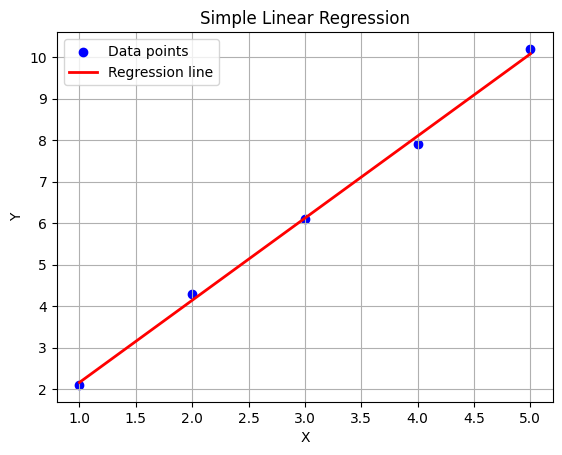

Coefficient: 1.98
Intercept: 0.18


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X_simple = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y_simple = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model_simple = LinearRegression()
model_simple.fit(X_simple, Y_simple)

# Predict Y values
Y_pred_simple = model_simple.predict(X_simple)

# Plot the data and the regression line
plt.scatter(X_simple, Y_simple, color='blue', label='Data points')
plt.plot(X_simple, Y_pred_simple, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Display coefficients and intercept
print(f"Coefficient: {model_simple.coef_[0]:.2f}")
print(f"Intercept: {model_simple.intercept_:.2f}")



Question 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data_multiple = {'Area': [1200, 1500, 1800, 2000],
                 'Rooms': [2, 3, 3, 4],
                 'Price': [250000, 300000, 320000, 370000]}
df_multiple = pd.DataFrame(data_multiple)

X_multiple = df_multiple[['Area', 'Rooms']]
Y_multiple = df_multiple['Price']

# Create and fit the model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, Y_multiple)

# Display coefficients and intercept
print("Multiple Linear Regression Results:")
print(f"Coefficients: {model_multiple.coef_}")
print(f"Intercept: {model_multiple.intercept_}")

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_multiple.columns
vif_data["VIF"] = [variance_inflation_factor(X_multiple.values, i)
                   for i in range(X_multiple.shape[1])]

print("\nMulticollinearity Check (VIF):")
display(vif_data)

Multiple Linear Regression Results:
Coefficients: [   63.15789474 34736.84210526]
Intercept: 103157.89473684214

Multicollinearity Check (VIF):


,feature,VIF
0,Area,127.796923
1,Rooms,127.796923


Question 8: Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

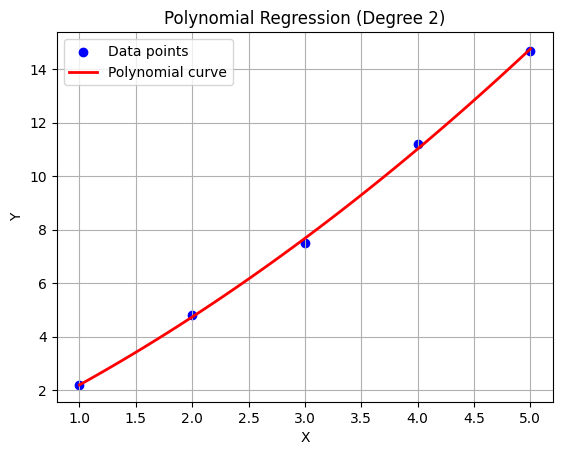

Polynomial Regression Results:
Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X_poly = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y_poly = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (2nd degree)
poly_features = PolynomialFeatures(degree=2)
X_poly_features = poly_features.fit_transform(X_poly)

# Create and fit the model
model_poly = LinearRegression()
model_poly.fit(X_poly_features, Y_poly)

# Predict Y values for plotting the curve
X_plot = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
X_plot_features = poly_features.transform(X_plot)
Y_pred_poly = model_poly.predict(X_plot_features)

# Plot the data and the polynomial curve
plt.scatter(X_poly, Y_poly, color='blue', label='Data points')
plt.plot(X_plot, Y_pred_poly, color='red', linewidth=2, label='Polynomial curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

# Display coefficients and intercept
print("Polynomial Regression Results:")
print(f"Coefficients: {model_poly.coef_}")
print(f"Intercept: {model_poly.intercept_}")


Question 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

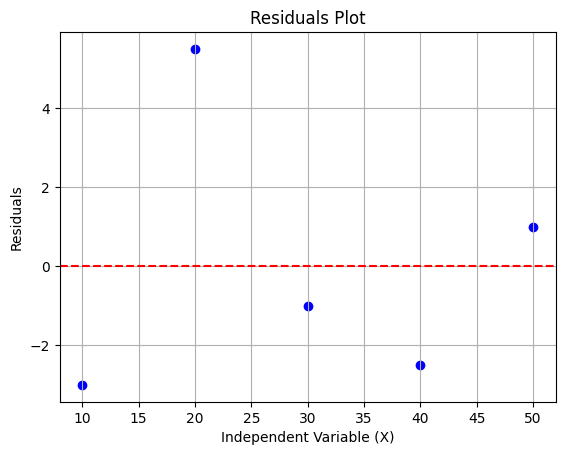

Assessing Heteroscedasticity:
Examine the residuals plot. If the spread of residuals is roughly constant across all values of the independent variable, the assumption of homoscedasticity is met. If the spread widens or narrows, heteroscedasticity is present.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X_residuals = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y_residuals = np.array([15, 35, 40, 50, 65])

# Create and fit the model
model_residuals = LinearRegression()
model_residuals.fit(X_residuals, Y_residuals)

# Calculate residuals
Y_pred_residuals = model_residuals.predict(X_residuals)
residuals = Y_residuals - Y_pred_residuals

# Create residuals plot
plt.scatter(X_residuals, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Assess heteroscedasticity
print("Assessing Heteroscedasticity:")
print("Examine the residuals plot. If the spread of residuals is roughly constant across all values of the independent variable, the assumption of homoscedasticity is met. If the spread widens or narrows, heteroscedasticity is present.")


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Answer:

Addressing Heteroscedasticity and Multicollinearity in a Real Estate Price Prediction Model:

Addressing Heteroscedasticity:

1. Transform the Dependent Variable: Apply a transformation to the dependent variable (house price). Common transformations include taking the logarithm (log transformation) or the square root. This can help stabilize the variance of the residuals.
2. Weighted Least Squares (WLS): If the pattern of heteroscedasticity is known or can be estimated, WLS can be used. This method assigns different weights to observations based on their variance, giving less weight to observations with higher variance.
3. Robust Standard Errors: Use robust standard errors (also known as heteroscedasticity-consistent standard errors). These standard errors are less sensitive to violations of the homoscedasticity assumption and provide more reliable statistical inference.
4. Model Re-specification: Consider if important variables are missing from the model or if the functional form of the relationship is incorrect. Adding relevant variables or using a non-linear model might help.

Addressing Multicollinearity:

1. Identify Highly Correlated Variables: Calculate the correlation matrix or use Variance Inflation Factor (VIF) to identify highly correlated independent variables. VIF values above a certain threshold (often 5 or 10) indicate significant multicollinearity.
2. Remove One of the Correlated Variables: If two variables are highly correlated, consider removing one of them from the model. Choose the variable that is less theoretically important or has a weaker relationship with the dependent variable.
3. Combine Correlated Variables: Create a new composite variable by combining the highly correlated variables (e.g., summing or averaging them) if it makes theoretical sense.
4. Principal Component Analysis (PCA): Use PCA to create a new set of uncorrelated variables ( principal components) from the original correlated variables. These principal components can then be used in the regression model.
5. Ridge Regression or Lasso Regression: These are regularization techniques that can handle multicollinearity by adding a penalty term to the regression equation, which shrinks the coefficients of correlated variables.
By addressing both heteroscedasticity and multicollinearity, you can improve the reliability, efficiency, and interpretability of your real estate price prediction model, leading to more accurate predictions and valid statistical inferences.